In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [3]:
pip install split_folders

In [0]:
data = "./"

In [0]:
!unzip -q data.zip -d $data

In [0]:
import split_folders

In [7]:
split_folders.ratio("data", "./", ratio = (.8,.1,.1))

Copying files: 30010 files [07:14, 69.04 files/s]


In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
pre_train_model = InceptionV3(
      include_top = False,
      weights = None,
      input_shape = (75,75,3)
)

In [0]:
pick_layer = pre_train_model.get_layer("mixed10")
layer_output = pick_layer.output

In [0]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [0]:
x = layers.Flatten()(layer_output)
x = layers.Dense(512, activation = "relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(10, activation = "softmax")(x)

model = Model(
      pre_train_model.input,
      x
)

model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["acc"]
)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
gen_train_data = ImageDataGenerator(
      rescale = 1./255
)

In [0]:
gen_valid_data = ImageDataGenerator(
      rescale = 1./255
)

In [0]:
train_folder = "/content/drive/My Drive/ML/train"
valid_folder = "/content/drive/My Drive/ML/val"

In [14]:
train_aug = gen_train_data.flow_from_directory(
      train_folder,
      target_size = (75,75),
      class_mode = "categorical",
      batch_size =32
)

Found 24000 images belonging to 10 classes.


In [15]:
valid_aug = gen_valid_data.flow_from_directory(
      valid_folder,
      target_size = (75,75),
      class_mode = "categorical",
      batch_size =32
)

Found 3000 images belonging to 10 classes.


In [16]:
history = model.fit_generator(
      train_aug,
      steps_per_epoch = 24000//32,
      epochs = 20,
      verbose = 1,
      validation_data = valid_aug,
      validation_steps = 3000//32
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
750/750 [==============================] - 48s 64ms/step - loss: 0.4524 - acc: 0.8813 - val_loss: 0.2725 - val_acc: 0.9338
Epoch 2/20
750/750 [==============================] - 47s 63ms/step - loss: 0.2028 - acc: 0.9539 - val_loss: 0.2084 - val_acc: 0.9580
Epoch 3/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1749 - acc: 0.9611 - val_loss: 0.1440 - val_acc: 0.9688
Epoch 4/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1570 - acc: 0.9655 - val_loss: 0.6842 - val_acc: 0.8743
Epoch 5/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1280 - acc: 0.9728 - val_loss: 0.2391 - val_acc: 0.9382
Epoch 6/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1468 - acc: 0.9685 - val_loss: 0.1588 - val_acc: 0.9627
Epoch 7/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1172 - acc: 0.9758 - val_loss: 0.0933 - va

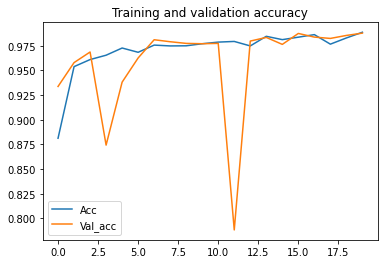

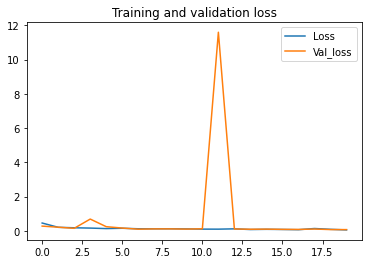

In [17]:
import matplotlib.pyplot as plt
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label = "Acc")
plt.plot  ( epochs, val_acc, label = "Val_acc")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, label = "Loss")
plt.plot  ( epochs, val_loss, label = "Val_loss")
plt.title ('Training and validation loss'   )
plt.legend()

In [18]:
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
className = ["0", "1","2", "3",  "4",  "5", "6",  "7", "8", "9"]

Saving hfsg.PNG to hfsg.PNG


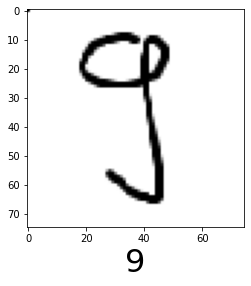

In [30]:
uploaded = files.upload()
for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, color_mode = "rgb", target_size=(75,75))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    result = model.predict(images)
    predict_labels = np.argmax(result)
    plt.imshow(img)
    plt.xlabel(className[predict_labels], size = 32)

In [0]:
model.save("handwritingDigitClassification.h5")